In [1]:
import pandas as pd
import numpy as np  

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tweets = pd.read_csv("trumptweet.csv")

In [3]:
tweets.head()

,source,text,created_at,id_str
0,Twitter for iPhone,RT @JesseBWatters: A new poll has Independents...,11-20-2019 01:51:06,1196969184598675456
1,Twitter for iPhone,A great day for Republicans a great day for ou...,11-20-2019 01:06:48,1196958035127783427
2,Twitter for iPhone,I agree but in the end we will win and save ou...,11-20-2019 00:10:41,1196943910624538625
3,Twitter for iPhone,RT @SenateGOP: It’s time for Democrats to *do ...,11-19-2019 23:57:52,1196940686999851011
4,Twitter for iPhone,RT @RepMarkMeadows: Chairman Schiff is clearly...,11-19-2019 23:32:55,1196934406314889216


In [4]:
for col in tweets.columns: 
    print(col)

source
text
created_at
id_str


In [5]:
tweets.dropna(inplace = True) 


In [6]:
np.array([len(tweets.text) for tweet in tweets])

array([28504, 28504, 28504, 28504])

In [7]:
tweets["Text_Length"]= tweets["text"].str.len() 
tweets.head()

,source,text,created_at,id_str,Text_Length
0,Twitter for iPhone,RT @JesseBWatters: A new poll has Independents...,11-20-2019 01:51:06,1196969184598675456,140
1,Twitter for iPhone,A great day for Republicans a great day for ou...,11-20-2019 01:06:48,1196958035127783427,56
2,Twitter for iPhone,I agree but in the end we will win and save ou...,11-20-2019 00:10:41,1196943910624538625,105
3,Twitter for iPhone,RT @SenateGOP: It’s time for Democrats to *do ...,11-19-2019 23:57:52,1196940686999851011,102
4,Twitter for iPhone,RT @RepMarkMeadows: Chairman Schiff is clearly...,11-19-2019 23:32:55,1196934406314889216,138


Above, we have added code to figure out the length of each tweet in tweets. 

In [8]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 0 to 28503
Data columns (total 5 columns):
source         28504 non-null object
text           28504 non-null object
created_at     28504 non-null object
id_str         28504 non-null int64
Text_Length    28504 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.3+ MB


In [9]:
tweets.describe()

,id_str,Text_Length
count,2.850400e+04,28504.000000
mean,8.041833e+17,144.871772
std,2.500244e+17,153.091759
min,4.183651e+17,2.000000
25%,5.830288e+17,100.000000
50%,7.501943e+17,134.000000
75%,1.056879e+18,140.000000
max,1.196969e+18,19135.000000


Here we can see that the created_at column is a non-null object, let's convert it to a datetime. 

In [10]:
tweets['created_at']= pd.to_datetime(tweets['created_at']) 
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 0 to 28503
Data columns (total 5 columns):
source         28504 non-null object
text           28504 non-null object
created_at     28504 non-null datetime64[ns]
id_str         28504 non-null int64
Text_Length    28504 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.3+ MB


In [11]:
mean = np.mean(tweets['Text_Length'])
print("The average length of tweets: ", mean)

The average length of tweets:  144.87177238282345


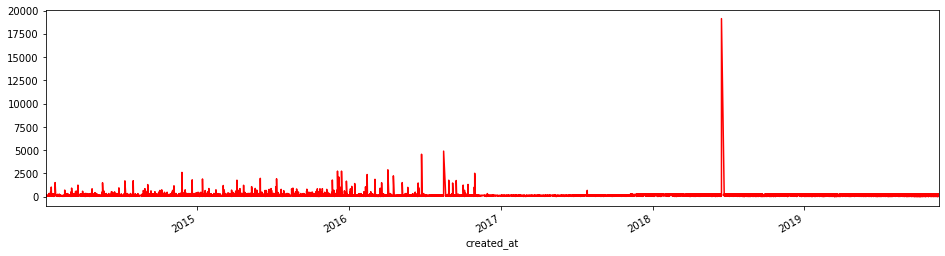

In [12]:
Tweet_lenghts = pd.Series(data=tweets['Text_Length'].values, index=tweets['created_at'])
Tweet_lenghts.plot(figsize=(16,4), color='r');

In [13]:
Tweet_lenghts.describe()

count    28504.000000
mean       144.871772
std        153.091759
min          2.000000
25%        100.000000
50%        134.000000
75%        140.000000
max      19135.000000
dtype: float64

This doesn't look right, we clearly have some outliers. Let's remove the extreme outliers. 

In [14]:
from scipy import stats
tweets=tweets[np.abs(tweets.Text_Length-tweets.Text_Length.mean()) <= (3*tweets.Text_Length.std())]
tweets.reset_index(inplace = True) 
tweets.tail()

,index,source,text,created_at,id_str,Text_Length
28398,28499,Twitter for Android,@ma22dogs: @realDonaldTrump @TrumpLasVegas the...,2014-01-02 06:03:17,418623509838192640,242
28399,28500,Twitter for Android,@noahshappy: @realDonaldTrump very true commen...,2014-01-02 06:02:48,418623389600083968,107
28400,28501,Twitter for Android,@MeleMallory: @realDonaldTrump You know it's a...,2014-01-02 05:47:30,418619537740017664,254
28401,28502,Twitter for Android,This very expensive GLOBAL WARMING bullshit ha...,2014-01-02 00:39:56,418542137899491328,138
28402,28503,Twitter for Android,Today is the first day of the rest of your lif...,2014-01-01 12:56:30,418365112844824577,70


In [15]:
Tweet_lengths = pd.Series(data=tweets['Text_Length'].values, index=tweets['created_at'])
Tweet_lengths.describe()

count    28403.000000
mean       140.454353
std         69.435507
min          2.000000
25%        100.000000
50%        133.000000
75%        140.000000
max        604.000000
dtype: float64

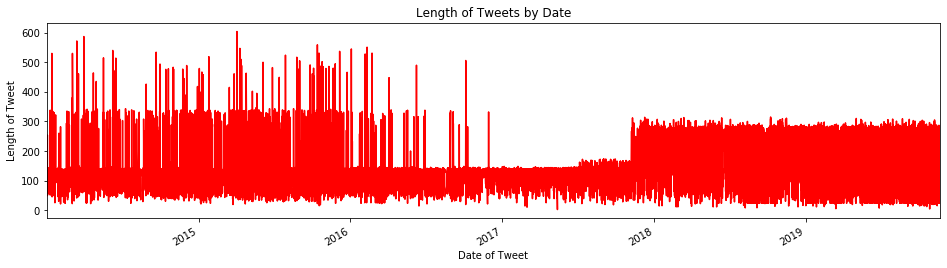

In [16]:
Tweet_lengths.plot(figsize=(16,4), color='r')
plt.xlabel('Date of Tweet')
plt.ylabel('Length of Tweet')
plt.title("Length of Tweets by Date")
plt.show()

In [17]:
sources = []
for source in tweets['source']:
    if source not in sources:
        sources.append(source)
        
print("Content sources:")
for source in sources:
    print("* {}".format(source))

Content sources:
* Twitter for iPhone
* Twitter Media Studio
* Twitter Web App
* Twitter Web Client
* Twitter for iPad
* Media Studio
* Twitter Ads
* Twitter for Android
* Periscope
* TweetDeck
* Instagram
* Mobile Web (M5)
* Twitter Mirror for iPad
* Twitter QandA
* Facebook
* Twitter for BlackBerry
* Neatly For BlackBerry 10
* Twitter for Websites
* Twitlonger


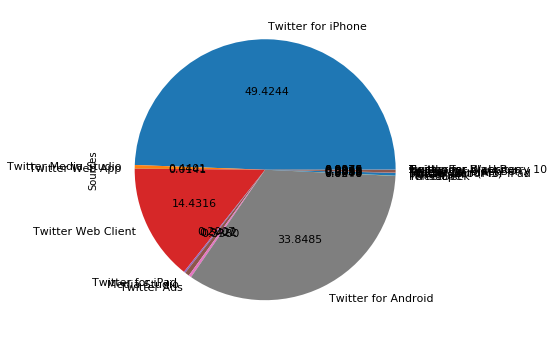

In [18]:
percent = np.zeros(len(sources))

for source in tweets['source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.4f', figsize=(6, 6));

In [19]:
for x,y in zip(percent,sources):
    print (x,y)

140.38 Twitter for iPhone
1.25 Twitter Media Studio
0.04 Twitter Web App
40.99 Twitter Web Client
0.57 Twitter for iPad
1.54 Media Studio
0.96 Twitter Ads
96.14 Twitter for Android
0.07 Periscope
0.02 TweetDeck
0.99 Instagram
0.01 Mobile Web (M5)
0.01 Twitter Mirror for iPad
0.1 Twitter QandA
0.01 Facebook
0.87 Twitter for BlackBerry
0.05 Neatly For BlackBerry 10
0.01 Twitter for Websites
0.02 Twitlonger


In [20]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Use re to remove special characers and keep only the necessary characters. 
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Classify whether a tweet is positive or negative using polarity for cleaned tweets
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [21]:
tweets['cleaned'] = np.array([ clean_tweet(tweet) for tweet in tweets['text'] ])

In [22]:
tweets.head() 

,index,source,text,created_at,id_str,Text_Length,cleaned
0,0,Twitter for iPhone,RT @JesseBWatters: A new poll has Independents...,2019-11-20 01:51:06,1196969184598675456,140,RT A new poll has Independents opposing the im...
1,1,Twitter for iPhone,A great day for Republicans a great day for ou...,2019-11-20 01:06:48,1196958035127783427,56,A great day for Republicans a great day for ou...
2,2,Twitter for iPhone,I agree but in the end we will win and save ou...,2019-11-20 00:10:41,1196943910624538625,105,I agree but in the end we will win and save ou...
3,3,Twitter for iPhone,RT @SenateGOP: It’s time for Democrats to *do ...,2019-11-19 23:57:52,1196940686999851011,102,RT It s time for Democrats to do their job and...
4,4,Twitter for iPhone,RT @RepMarkMeadows: Chairman Schiff is clearly...,2019-11-19 23:32:55,1196934406314889216,138,RT Chairman Schiff is clearly not getting the ...


In [23]:
tweets['sentiment'] = np.array([ analize_sentiment(tweet) for tweet in tweets['text'] ])


In [24]:
tweets.tail()

,index,source,text,created_at,id_str,Text_Length,cleaned,sentiment
28398,28499,Twitter for Android,@ma22dogs: @realDonaldTrump @TrumpLasVegas the...,2014-01-02 06:03:17,418623509838192640,242,the rooms are like condos Perfect for families...,1
28399,28500,Twitter for Android,@noahshappy: @realDonaldTrump very true commen...,2014-01-02 06:02:48,418623389600083968,107,very true comment Donald I m glad we have peop...,1
28400,28501,Twitter for Android,@MeleMallory: @realDonaldTrump You know it's a...,2014-01-02 05:47:30,418619537740017664,254,You know it s actually called CLIMATE CHANGE r...,1
28401,28502,Twitter for Android,This very expensive GLOBAL WARMING bullshit ha...,2014-01-02 00:39:56,418542137899491328,138,This very expensive GLOBAL WARMING bullshit ha...,-1
28402,28503,Twitter for Android,Today is the first day of the rest of your lif...,2014-01-01 12:56:30,418365112844824577,70,Today is the first day of the rest of your lif...,1


In [25]:
positive = [ tweet for index, tweet in enumerate(tweets['text']) if tweets['sentiment'][index] > 0]
neutral = [ tweet for index, tweet in enumerate(tweets['text']) if tweets['sentiment'][index] == 0]
negative = [ tweet for index, tweet in enumerate(tweets['text']) if tweets['sentiment'][index] < 0]

In [26]:
print("Positive tweets: {}%".format(len(positive)*100/len(tweets['text'])))
print("Neutral tweets: {}%".format(len(neutral)*100/len(tweets['text'])))
print("Negative tweets: {}%".format(len(negative)*100/len(tweets['text'])))

Positive tweets: 55.07516811604408%
Neutral tweets: 26.571136851741013%
Negative tweets: 18.353695032214908%


In [27]:
tweets['date'] = tweets['created_at'].dt.date
tweets = tweets.groupby(by='date').count()

In [28]:
tweets['count']= tweets['created_at']
mean_tweets = tweets['count'].mean()
print(mean_tweets)


13.525238095238095


Stocks Data

In [29]:
stocks = pd.read_csv('Stock-Data.csv')
stocks.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2014,1845.86,1831.98,1845.86,1827.74,1812452608
1,03-Jan-2014,1833.21,1831.37,1838.24,1829.13,1649433088
2,06-Jan-2014,1832.31,1826.77,1837.16,1823.73,1979986176
3,07-Jan-2014,1828.71,1837.88,1840.10,1828.71,2067762944
4,08-Jan-2014,1837.90,1837.49,1840.02,1831.40,2319179520


In [30]:
stocks.describe()

,Open Price,Close Price,High Price,Low Price,Volume
count,1482.000000,1482.000000,1482.000000,1482.000000,1.482000e+03
mean,2350.480439,2350.719818,2360.651559,2339.222126,2.126153e+09
std,368.611382,368.495345,369.581323,367.520673,4.598882e+08
min,1743.820000,1741.890000,1755.790000,1737.920000,5.181584e+08
25%,2047.865000,2047.732500,2060.375000,2040.510000,1.848538e+09
50%,2245.315000,2243.770000,2252.635000,2235.595000,2.060772e+09
75%,2711.905000,2709.510000,2727.737500,2697.105000,2.325534e+09
max,3127.450000,3122.030000,3127.640000,3113.470000,4.779733e+09


In [31]:
stocks['Close Price'] = stocks['Close Price'].astype(float)
stocks['change']=((stocks['Close Price']-stocks['Open Price'])/stocks['Open Price'])*100

In [32]:
stocks.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,change
0,02-Jan-2014,1845.86,1831.98,1845.86,1827.74,1812452608,-0.751953
1,03-Jan-2014,1833.21,1831.37,1838.24,1829.13,1649433088,-0.100370
2,06-Jan-2014,1832.31,1826.77,1837.16,1823.73,1979986176,-0.302351
3,07-Jan-2014,1828.71,1837.88,1840.10,1828.71,2067762944,0.501446
4,08-Jan-2014,1837.90,1837.49,1840.02,1831.40,2319179520,-0.022308


In [33]:
tweets['count'].corr(stocks['change'])

nan

In [34]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.set_index('Date',inplace=True)

In [35]:
df = pd.merge(stocks,tweets,left_index=True,right_index=True)
df.head()

,Open Price,Close Price,High Price,Low Price,Volume,change,index,source,text,created_at,id_str,Text_Length,cleaned,sentiment,count
2014-01-02,1845.86,1831.98,1845.86,1827.74,1812452608,-0.751953,15,15,15,15,15,15,15,15,15
2014-01-03,1833.21,1831.37,1838.24,1829.13,1649433088,-0.100370,9,9,9,9,9,9,9,9,9
2014-01-06,1832.31,1826.77,1837.16,1823.73,1979986176,-0.302351,11,11,11,11,11,11,11,11,11
2014-01-07,1828.71,1837.88,1840.10,1828.71,2067762944,0.501446,7,7,7,7,7,7,7,7,7
2014-01-08,1837.90,1837.49,1840.02,1831.40,2319179520,-0.022308,5,5,5,5,5,5,5,5,5


In [36]:
df = df.loc[~df.index.duplicated(keep='first')]
df.head()

,Open Price,Close Price,High Price,Low Price,Volume,change,index,source,text,created_at,id_str,Text_Length,cleaned,sentiment,count
2014-01-02,1845.86,1831.98,1845.86,1827.74,1812452608,-0.751953,15,15,15,15,15,15,15,15,15
2014-01-03,1833.21,1831.37,1838.24,1829.13,1649433088,-0.100370,9,9,9,9,9,9,9,9,9
2014-01-06,1832.31,1826.77,1837.16,1823.73,1979986176,-0.302351,11,11,11,11,11,11,11,11,11
2014-01-07,1828.71,1837.88,1840.10,1828.71,2067762944,0.501446,7,7,7,7,7,7,7,7,7
2014-01-08,1837.90,1837.49,1840.02,1831.40,2319179520,-0.022308,5,5,5,5,5,5,5,5,5


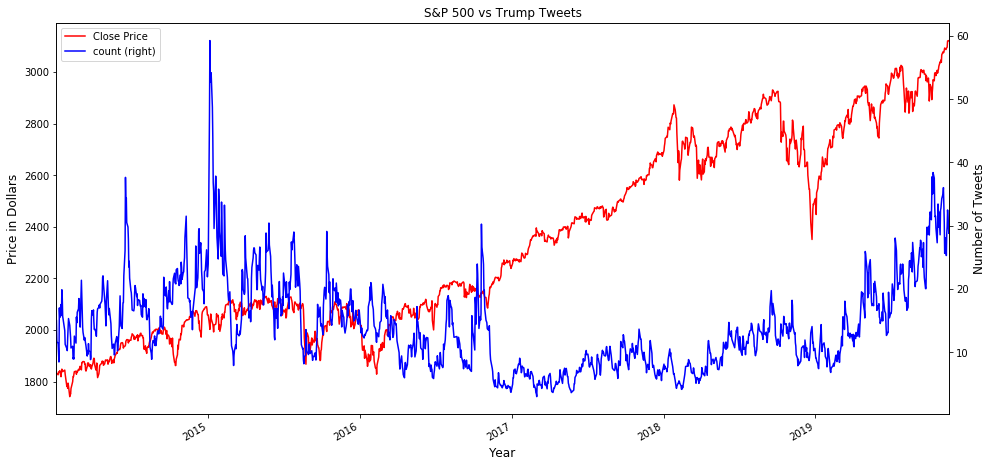

In [37]:
plt.figure()                       
ax = df['Close Price'].plot(figsize=(16,8),color='red', legend=True, title='S&P 500 vs Trump Tweets')
bx = df['count'].ewm(com=4).mean().plot(secondary_y=True,color='blue', legend=True)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Price in Dollars',fontsize=12)
bx.set_ylabel('Number of Tweets',fontsize=12)
plt.show()

The presidency of Donald Trump began at noon EST on January 20, 2017, which may be where the more notable shifts. 